# Sensible heat flux figure
- This script is used to visualize sensible heat flux variations;
- Simulations: CNTL, WRF_LCZ, LI_LCZ, CESM_LCZ;

In [4]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

In [7]:
psites = ["AU-Preston","AU-SurreyHills","CA-Sunset","FI-Kumpula","FI-Torni",
          "FR-Capitole","GR-HECKOR","JP-Yoyogi","KR-Jungnang","KR-Ochang",
          "MX-Escandon","NL-Amsterdam","PL-Lipowa","PL-Narutowicza","SG-TelokKurau06",
          "UK-KingsCollege","UK-Swindon","US-Baltimore","US-Minneapolis1","US-Minneapolis2",
          "US-WestPhoenix"]

START= ['1993', '1994', '2002', '2000', '2000',
        '1994', '2009', '2006', '2007', '2005', 
        '2001', '2009', '1998', '1998', '1996', 
        '2002', '2001', '1992', '1996', '1996', 
        '2001']

msites = ["AU-Pre","AU-Sur","CA-Sun","FI-Kum","FI-Tor",
          "FR-Cap","GR-HEC","JP-Yoy","KR-Jun","KR-Och",
          "MX-Esc","NL-Ams","PL-Lip","PL-Nar","SG-Tel",
          "UK-Kin","UK-Swi","US-Bal","US-Mi1","US-Mi2",
          "US-Wes"]

zone = [10, 10, -8, 2, 2, 
        1, 2, 9, 9, 9, 
        -6, 1, 1, 1, 8, 
        0, 0, -5, -6, -6, 
        -7]

start_date = ['2003-08-12T03:30:00', '2004-02-23T05:00:00', '2012-01-01T00:00:00', '2010-12-31T22:30:00', '2010-12-31T22:30:00',
              '2004-02-20T00:30:00', '2019-06-30T22:00:00', '2016-03-31T15:00:00', '2017-01-24T16:00:00', '2015-06-07T15:00:00',
              '2011-06-01T17:00:00', '2019-01-01T00:00:00', '2008-01-01T00:00:00', '2008-01-01T00:00:00', '2006-04-30T16:30:00',
              '2012-04-04T00:00:00', '2011-05-11T19:00:00', '2002-01-01T05:00:00', '2006-06-01T18:00:00', '2006-06-01T18:00:00',
              '2011-12-16T18:30:00']

end_date = ['2004-11-28T11:30:00', '2004-07-19T22:00:00', '2016-12-31T22:00:00', '2013-12-31T20:30:00', '2013-12-31T20:30:00',
            '2005-02-28T22:30:00', '2020-06-30T20:00:00', '2020-03-31T11:00:00', '2019-04-29T05:00:00', '2017-07-26T00:00:00',
            '2012-09-13T12:30:00', '2020-10-13T08:30:00', '2012-12-31T20:00:00', '2012-12-31T20:00:00', '2007-03-31T14:30:00',
            '2013-12-31T21:00:00', '2013-04-25T08:00:00', '2007-01-01T01:00:00', '2009-05-29T11:30:00', '2008-01-01T00:00:00',
            '2013-01-01T05:00:00']

mid_date = ['2004-01-01 00:00:00', '2004-05-01 00:00:00', '2014-01-01 00:00:00', '2012-01-01 00:00:00', '2012-01-01 00:00:00',
            '2004-09-01T00:00:00', '2020-01-01T00:00:00', '2018-01-01T00:00:00', '2018-01-01T00:00:00', '2016-01-01T00:00:00',
            '2012-01-01T00:00:00', '2020-01-01T00:00:00', '2010-01-01T00:00:00', '2010-01-01T00:00:00', '2007-01-01T00:00:00',
            '2013-01-01T00:00:00', '2012-01-01T00:00:00', '2004-01-01T00:00:00', '2008-01-01T00:00:00', '2009-05-29T11:30:00',
            '2012-06-01T00:00:00']

archive = '/Projects/archive/0project2/'
END = ['2004', '2004', '2016', '2013', '2013',
       '2005', '2020', '2020', '2019', '2017', 
       '2012', '2020',  '2012', '2012', '2007', 
       '2014', '2013',  '2007', '2009', '2009',   
       '2013']

var1 = 'Qh'
var2 = 'FSH_U'
data_list = ['Qh_obs', 'Qh_def', 'Qh_wrflcz', 'Qh_lilcz', 'Qh_cesmlcz']
alpha = [0.1, 0.1, 0.1, 0.1, 0.1]
#lc0 = '#083550'
#lc1 = '#006bac'
#lc2 = '#3da4e3'
#lc3 = '#6c64d4'
#lc4 = '#32da7e'
lc0 = '#1b9e77'
lc1 = '#d95f02'
lc2 = '#7570b3'
lc3 = '#e7298a'
lc4 = '#66a61e'
lc = [lc0, lc1, lc2, lc3, lc4]
labelfont = 6
linewidth = 0.5
labelcolor = '#6b6b6b'
padding = 4
model_list = ['OBS', 'CNTL', 'WRF_LCZ', 'LI_LCZ', 'CESM_LCZ']
offset = 0.07
pad = 1
xwidth = 0.5
length = 2
llc = [lc0, lc0, lc1, lc1, lc2, lc2, lc3, lc3, lc4, lc4]
path = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/'
folder = 'output_analysis/project2/sp/temperal_variation/output/'
handletextpad = 0.5

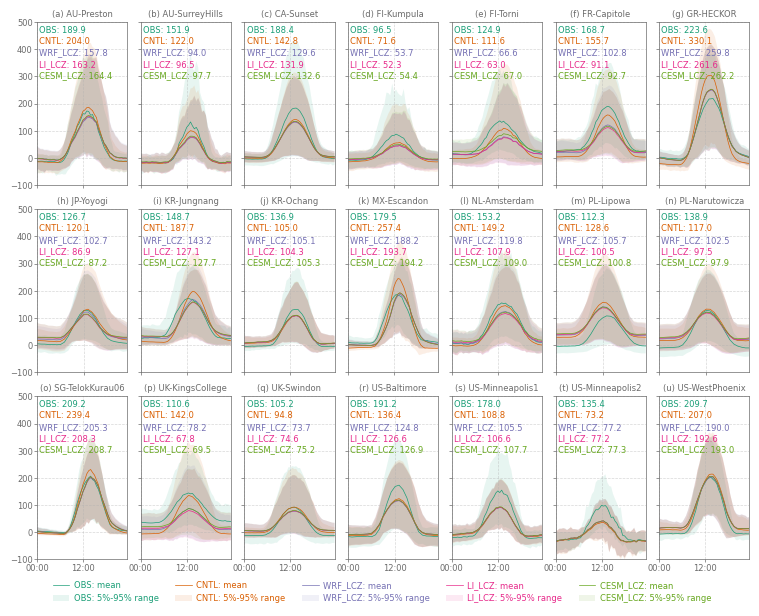

In [8]:
num_rows = 3  # Total number of rows
num_cols = 7  # Total number of columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(7.5, 6))
ax = axs.flatten()

for i in range(len(psites)):
# for i in [0]:    
    GRIDNAME = psites[i]
    
    df = pd.read_csv(path + folder + GRIDNAME + '.csv', usecols=['diurnal', 'Qh_obs', 'Qh_def', 'Qh_wrflcz', 'Qh_lilcz', 'Qh_cesmlcz'])
    #df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
    diurnal_mean = df.groupby('diurnal').mean(numeric_only=True).reset_index()
    diurnal_5 = df.groupby('diurnal').quantile(0.05).reset_index()
    diurnal_95 = df.groupby('diurnal').quantile(0.95).reset_index()
    for j, data in enumerate(data_list):
        ax[i].plot(diurnal_mean['diurnal'], diurnal_mean[data], label=model_list[j] + ': mean', color=lc[j], linewidth=linewidth)
        ax[i].fill_between(diurnal_mean['diurnal'], diurnal_5[data], diurnal_95[data], alpha=alpha[j], color=lc[j], edgecolor='none', label = model_list[j] + ': 5%-95% range')
        max_min_diff = diurnal_mean[data].max() - diurnal_mean[data].min()
        ax[i].text(0.025,0.925 - offset * j, model_list[j] + ': {:.1f}'.format(max_min_diff),
        #ax[i].text(0.01,0.9 - offset * j, '$\\Delta Q_{h}$ ' + model_list[j] + ': {:.1f}'.format(max_min_diff),
                    fontsize=labelfont, color=lc[j], horizontalalignment='left',
                    verticalalignment='bottom', transform=ax[i].transAxes)
    #ax[i].set_xticks([diurnal_mean.diurnal.iloc[0], '12:00', diurnal_mean.diurnal.iloc[-1]])
    ax[i].set_xticks([diurnal_mean.diurnal.iloc[0], '12:00'])
    ax[i].set_xlim([diurnal_mean.diurnal.iloc[0], diurnal_mean.diurnal.iloc[-1]])  
    ax[i].set_ylim(-100,500)
    ax[i].set_title(f'({string.ascii_lowercase[i]}) {GRIDNAME}',fontsize=labelfont,color=labelcolor, pad = padding)   
    # ax[i].set_ylabel('W m⁻²',labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    #ax[i].yaxis.set_label_coords(-0.05, 1.025)
    if i % num_cols != 0:
        ax[i].tick_params(axis='y', labelleft=False)  # Hide y-axis labels
        ax[i].set_yticklabels([])  # Optional: remove tick labels as well
    if i < (num_rows - 1) * num_cols:
        ax[i].tick_params(axis='x', labelbottom=False)  # Hide x-axis labels
        ax[i].set_xticklabels([])
        
    ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax[i].spines['top'].set_color(labelcolor)
    ax[i].spines['right'].set_color(labelcolor)
    ax[i].spines['bottom'].set_color(labelcolor)
    ax[i].spines['left'].set_color(labelcolor)
    ax[i].spines['top'].set_linewidth(xwidth)
    ax[i].spines['right'].set_linewidth(xwidth)
    ax[i].spines['bottom'].set_linewidth(xwidth)
    ax[i].spines['left'].set_linewidth(xwidth)
    ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    
plt.subplots_adjust(left=0.04, right=0.99, bottom=0.075, top=0.97, wspace=0.15, hspace= 0.15)
lines, labels = ax[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.01), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=5)

for i, text in enumerate(legend.get_texts()):
    text.set_color(llc[i])

output_dir = path + 'output_analysis/project2/sp/qh_variation/'
fig.savefig(output_dir + 'sensible_flux.png', dpi=300)   
fig.savefig(output_dir + 'sensible_flux.pdf', dpi=600)

# calculation

In [23]:
combine = []

for i in range(len(psites)):
    GRIDNAME = psites[i]
    df = pd.read_csv(path + folder + GRIDNAME + '.csv', usecols=['diurnal', 'Qh_obs', 'Qh_def', 'Qh_wrflcz', 'Qh_lilcz'])
    
    # Group by 'diurnal' and calculate the mean
    diurnal_mean = df.groupby('diurnal').mean(numeric_only=True).reset_index()
    diurnal_mean['site'] = msites[i]
    # Append the resulting DataFrame to the list
    combine.append(diurnal_mean)

# Concatenate all DataFrames in the list into one DataFrame
combined_df = pd.concat(combine, ignore_index=True)
combined_df

,diurnal,Qh_obs,Qh_def,Qh_wrflcz,Qh_lilcz,site
0,00:00,-12.622735,-14.695702,-1.660998,-3.357998,AU-Pre
1,00:30,-13.204895,-15.057010,-2.156575,-3.862163,AU-Pre
2,01:00,-12.296614,-14.933769,-2.759376,-4.406159,AU-Pre
3,01:30,-12.677729,-14.920065,-3.092049,-4.712304,AU-Pre
4,02:00,-13.392955,-15.899448,-4.441503,-6.021803,AU-Pre
...,...,...,...,...,...,...
907,21:30,-6.100680,8.563249,13.054108,12.618009,US-Wes
908,22:00,-7.003913,7.564395,12.724803,12.267526,US-Wes
909,22:30,-6.341215,7.158419,12.899323,12.429040,US-Wes
910,23:00,-6.788037,6.684278,12.928957,12.425731,US-Wes


In [47]:
sorted_diurnal_df = diurnal_df.sort_values(by=['site'])
# Group by 'site' and 'diurnal' and calculate the difference between max and min
diurnal_diff = diurnal_df.groupby(['site']).agg(
    Qh_obs_diff=('Qh_obs', lambda x: x.max() - x.min()),
    Qh_def_diff=('Qh_def', lambda x: x.max() - x.min()),
    Qh_base_diff=('Qh_base', lambda x: x.max() - x.min()),
    Qh_wrf_diff=('Qh_wrf', lambda x: x.max() - x.min()),
    Qh_li_diff=('Qh_li', lambda x: x.max() - x.min())
).reset_index()

diurnal_diff['diff_def'] = diurnal_diff['Qh_def_diff'] - diurnal_diff['Qh_obs_diff']
diurnal_diff['diff_base'] = diurnal_diff['Qh_base_diff'] - diurnal_diff['Qh_obs_diff']
diurnal_diff['diff_wrf'] = diurnal_diff['Qh_wrf_diff'] - diurnal_diff['Qh_obs_diff']
diurnal_diff['diff_li'] = diurnal_diff['Qh_li_diff'] - diurnal_diff['Qh_obs_diff']

diurnal_diff['percentage_diff_def'] = (diurnal_diff['diff_def'] / diurnal_diff['Qh_obs_diff']) * 100
diurnal_diff['percentage_diff_base'] = (diurnal_diff['diff_base'] / diurnal_diff['Qh_obs_diff']) * 100
diurnal_diff['percentage_diff_wrf'] = (diurnal_diff['diff_wrf'] / diurnal_diff['Qh_obs_diff']) * 100
diurnal_diff['percentage_diff_li'] = (diurnal_diff['diff_li'] / diurnal_diff['Qh_obs_diff']) * 100
print(diurnal_diff['percentage_diff_def'].mean(), diurnal_diff['percentage_diff_def'].std(), 
      diurnal_diff['percentage_diff_base'].mean(), diurnal_diff['percentage_diff_base'].std(),
      diurnal_diff['percentage_diff_wrf'].mean(), diurnal_diff['percentage_diff_wrf'].std(),
      diurnal_diff['percentage_diff_li'].mean(), diurnal_diff['percentage_diff_li'].std())

-5.014083 24.326456 -24.532665 17.947289 -23.048899 17.58694 -25.232828 18.345701


In [48]:
diurnal_diff

,site,Qh_obs_diff,Qh_def_diff,Qh_base_diff,Qh_wrf_diff,Qh_li_diff,diff_def,diff_base,diff_wrf,diff_li,percentage_diff_def,percentage_diff_base,percentage_diff_wrf,percentage_diff_li
0,AU-Pre,189.893951,195.351074,164.419540,157.770218,163.214798,5.457123,-25.474411,-32.123734,-26.679153,2.873774,-13.415072,-16.916670,-14.049501
1,AU-Sur,151.927948,136.434341,97.744102,93.961449,96.467651,-15.493607,-54.183846,-57.966499,-55.460297,-10.197996,-35.664173,-38.153942,-36.504341
2,CA-Sun,188.411423,131.183502,132.599579,129.618423,131.912735,-57.227921,-55.811844,-58.792999,-56.498688,-30.373913,-29.622326,-31.204584,-29.986870
3,FI-Kum,96.549065,106.364502,54.449806,53.699677,52.322990,9.815437,-42.099258,-42.849388,-44.226074,10.166268,-43.604004,-44.380943,-45.806839
4,FI-Tor,124.901787,134.711517,66.962601,66.608971,62.991150,9.809731,-57.939186,-58.292816,-61.910637,7.853955,-46.387794,-46.670921,-49.567455
5,FR-Cap,168.733688,144.568893,92.664848,102.801895,91.088425,-24.164795,-76.068840,-65.931793,-77.645264,-14.321263,-45.082188,-39.074471,-46.016457
6,GR-HEC,223.624603,316.284760,262.231445,259.775696,261.642303,92.660156,38.606842,36.151093,38.017700,41.435581,17.264130,16.165974,17.000679
7,JP-Yoy,126.677917,122.065536,87.223892,102.690048,86.892563,-4.612381,-39.454025,-23.987869,-39.785355,-3.641030,-31.145149,-18.936110,-31.406700
8,KR-Jun,148.682114,167.910141,127.707207,143.166229,127.084236,19.228027,-20.974907,-5.515884,-21.597878,12.932306,-14.107216,-3.709851,-14.526211
9,KR-Och,136.897659,106.502731,105.344231,105.088181,104.348511,-30.394928,-31.553429,-31.809479,-32.549149,-22.202665,-23.048918,-23.235956,-23.776264
